<a href="https://www.kaggle.com/egyfirst/denmune-clustering-iris-dataset?scriptVersionId=84775816" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from numpy import genfromtxt
import os
!mkdir data #let us create data folder to hold our data

In [2]:
# install DenMune clustering algorithm using pip command from the offecial Python repository, PyPi
# from https://pypi.org/project/denmune/
!pip install denmune

# now import it
from denmune import DenMune

     |████████████████████████████████| 2.2 MB 284 kB/s            
     |████████████████████████████████| 41 kB 392 kB/s             
  Preparing metadata (setup.py) ... - done
  Created wheel for treelib: filename=treelib-1.6.1-py3-none-any.whl size=18386 sha256=fb8743788fbee29cd1cc47e567168b02f82f52046acb184015ebc168f6616750
  Stored in directory: /root/.cache/pip/wheels/89/be/94/2c6d949ce599d1443426d83ba4dc93cd35c0f4638260930a53
Successfully built treelib


In [3]:
dataset = 'iris' # let us take iris dataset as an example
data_path = "/kaggle/input/denmune-datasets/"
output_path = "data/" # this is where any output will be saved to, i.e. 2-d version of N-D dataset

file_ext = ".txt"
data_file = data_path + dataset + file_ext #  i.e. 'iris' + '.txt' ==> iris.txt
data = genfromtxt(data_file , delimiter='\t') 

ground_ext = "-gt"
ground_file = data_path + dataset + ground_ext + file_ext
data_labels =  genfromtxt(ground_file, delimiter='\t') #  i.e. 'iris' + + '-gt + '.txt' ==> iris-gt.txt 

data2d_ext = '-2d'
file_2d =  output_path + dataset + data2d_ext + file_ext # 'iris' + '-2d' + '.txt' ==> iris-2d.txt

Dataset's Groundtruth


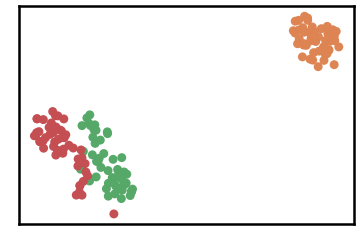



DenMune Analyzer
├── exec_time
│   ├── DenMune: 0.018
│   ├── NGT: 0.003
│   └── t_SNE: 0.727
├── n_clusters
│   ├── actual: 3
│   └── detected: 3
├── n_points
│   ├── dim: 4
│   ├── noise
│   │   ├── type-1: 0
│   │   └── type-2: 0
│   ├── size: 150
│   ├── strong: 86
│   └── weak
│       ├── all: 64
│       ├── failed to merge: 0
│       └── succeeded to merge: 64
└── validity
    ├── ACC: 135
    ├── AMI: 0.795
    ├── ARI: 0.746
    ├── F1: 0.898
    ├── NMI: 0.798
    ├── completeness: 0.809
    └── homogeneity: 0.787



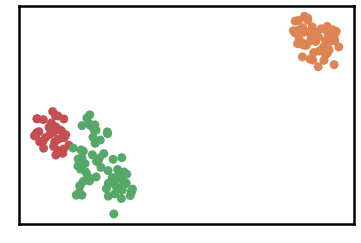

k= 11 F1 score is: 0.898


In [4]:
# Denmune's Paramaters
verpose_mode = True # view in-depth analysis of time complexity and outlier detection, num of clusters
show_groundtrugh = True  # show plots on/off
show_noise = True # show noise and outlier on/off

knn = 11
dm = DenMune(data=data, file_2d=file_2d,  k_nearest=knn, verpose=verpose_mode, show_noise=show_noise, rgn_tsne=False)

if show_groundtrugh:
    # Let us plot the groundtruth of this dataset which is reduced to 2-d using t-SNE
    print ("Dataset\'s Groundtruth")
    dm.plot_clusters(labels=data_labels, ground=True)
    print('\n', "=====" * 20 , '\n')       

labels_pred = dm.fit_predict()
validity = dm.validate_Clusters(labels_true=data_labels, labels_pred=labels_pred)

dm.plot_clusters(labels=labels_pred, show_noise=show_noise)
        
validity_key = "F1"
# Acc=1, F1-score=2,  NMI=3, AMI=4, ARI=5,  Homogeneity=6, and Completeness=7       
print ('k=' , knn, validity_key , 'score is:', round(validity[validity_key],3))